In [1]:
import os
import re
import random
import numpy as np
import pandas as pd
import scipy.io
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import utils

In [2]:
datadir = '../datasets/NNN/'
fnames = utils.fnames(datadir)
raster_data = pd.read_pickle(os.path.join(datadir, ('unit_data_full.pkl')))
fr_data = pd.read_pickle(os.path.join(datadir, 'fr_data.pkl'))

In [31]:
raster_data['roi'].unique()

array([None, 'MB1_3_B', 'MO2_21_O', 'Unknown_22_O', 'MB2_20_B',
       'Unknown_11_O', 'Unknown_20_B', 'MO1s1_4_O', 'Unknown_4_O',
       'Unknown_6_B', 'MB2_21_B', 'LPP4_1_O', 'Unknown_19_F', 'LPP1_2_O',
       'Unknown_9_B', 'MF1_9_F', 'Unknown_23_B', 'MB1_8_B', 'MF1_8_F',
       'Unknown_15_O', 'AF3_18_F', 'AB3_18_B', 'CLC3_13_O',
       'Unknown_14_O', 'AO2_24_O', 'PITP4_10_O', 'MB3_12_B',
       'Unknown_6_O', 'MF1_7_F', 'MO1s2_5_O', 'Unknown_5_F', 'AB3_12_B',
       'Unknown_16_O', 'AB3_17_B', 'Unknown_26_O', 'Unknown_27_B',
       'AO5_25_O', 'AMC3_28_F'], dtype=object)

In [74]:
metric = 'correlation'
roi = 'CLC3_13_O' # 'MF1_9_F', 'PITP4_10_O', 'CLC3_13_O'

roi_data = raster_data[(raster_data['roi']==roi)]
stacked = np.stack(roi_data['img_psth'])

fr_roi = fr_data[(fr_data['roi']==roi)]
out = utils.derag_fr(fr_roi, period='early')

In [75]:
# calculate the mean firing rate across trials for each unit, image
mean_firing = out.mean(axis=2)

# sort by mean_firing for each unit
sort_indices = np.argsort(mean_firing, axis=1)[:, ::-1]

# broadcast to shape (units, 1, images)
sort_indices_expanded = sort_indices[:, np.newaxis, :]

stacked_sorted = np.take_along_axis(stacked, sort_indices_expanded, axis=2)

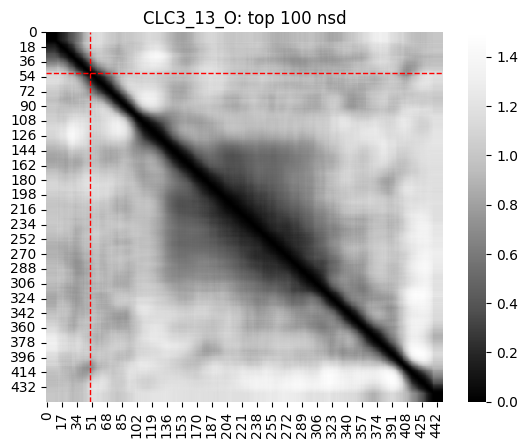

In [77]:
topn = 100

# plot time x time
substacked = stacked_sorted[:, :, :topn]
# average over units
averaged = np.mean(substacked, axis=0)

fig,ax = plt.subplots(1,1)

rdm = squareform(pdist(averaged, metric=metric))
sns.heatmap(rdm, cmap=sns.color_palette('Greys_r', as_cmap=True), vmax=1.5)
ax.set_title(f'{roi}: top {topn} nsd')

ax.axvline(x=50, color='red', linestyle='--', linewidth=1)
ax.axhline(y=50, color='red', linestyle='--', linewidth=1)
plt.show()